In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [8]:
data = pd.read_csv("C:\\Users\\drobn\\Desktop\\pmt\\data\\diabetes.csv")
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
data.shape

In [ ]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

In [9]:
data = data.astype(np.int32)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70692 non-null  int32
 1   HighBP                70692 non-null  int32
 2   HighChol              70692 non-null  int32
 3   CholCheck             70692 non-null  int32
 4   BMI                   70692 non-null  int32
 5   Smoker                70692 non-null  int32
 6   Stroke                70692 non-null  int32
 7   HeartDiseaseorAttack  70692 non-null  int32
 8   PhysActivity          70692 non-null  int32
 9   Fruits                70692 non-null  int32
 10  Veggies               70692 non-null  int32
 11  HvyAlcoholConsump     70692 non-null  int32
 12  AnyHealthcare         70692 non-null  int32
 13  NoDocbcCost           70692 non-null  int32
 14  GenHlth               70692 non-null  int32
 15  MentHlth              70692 non-null  int32
 16  Phys

In [ ]:
data['Diabetes_binary'].value_counts().hvplot.bar(
    title="Diabetes cases count", xlabel='Diabetes confirmed', ylabel='Count', 
    width=500, height=300
)

In [5]:
categorical_val = [column for column in data.columns if len(data[column].unique()) <= 5]
continous_val = [column for column in data.columns if len(data[column].unique()) > 5]
continous_val

['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

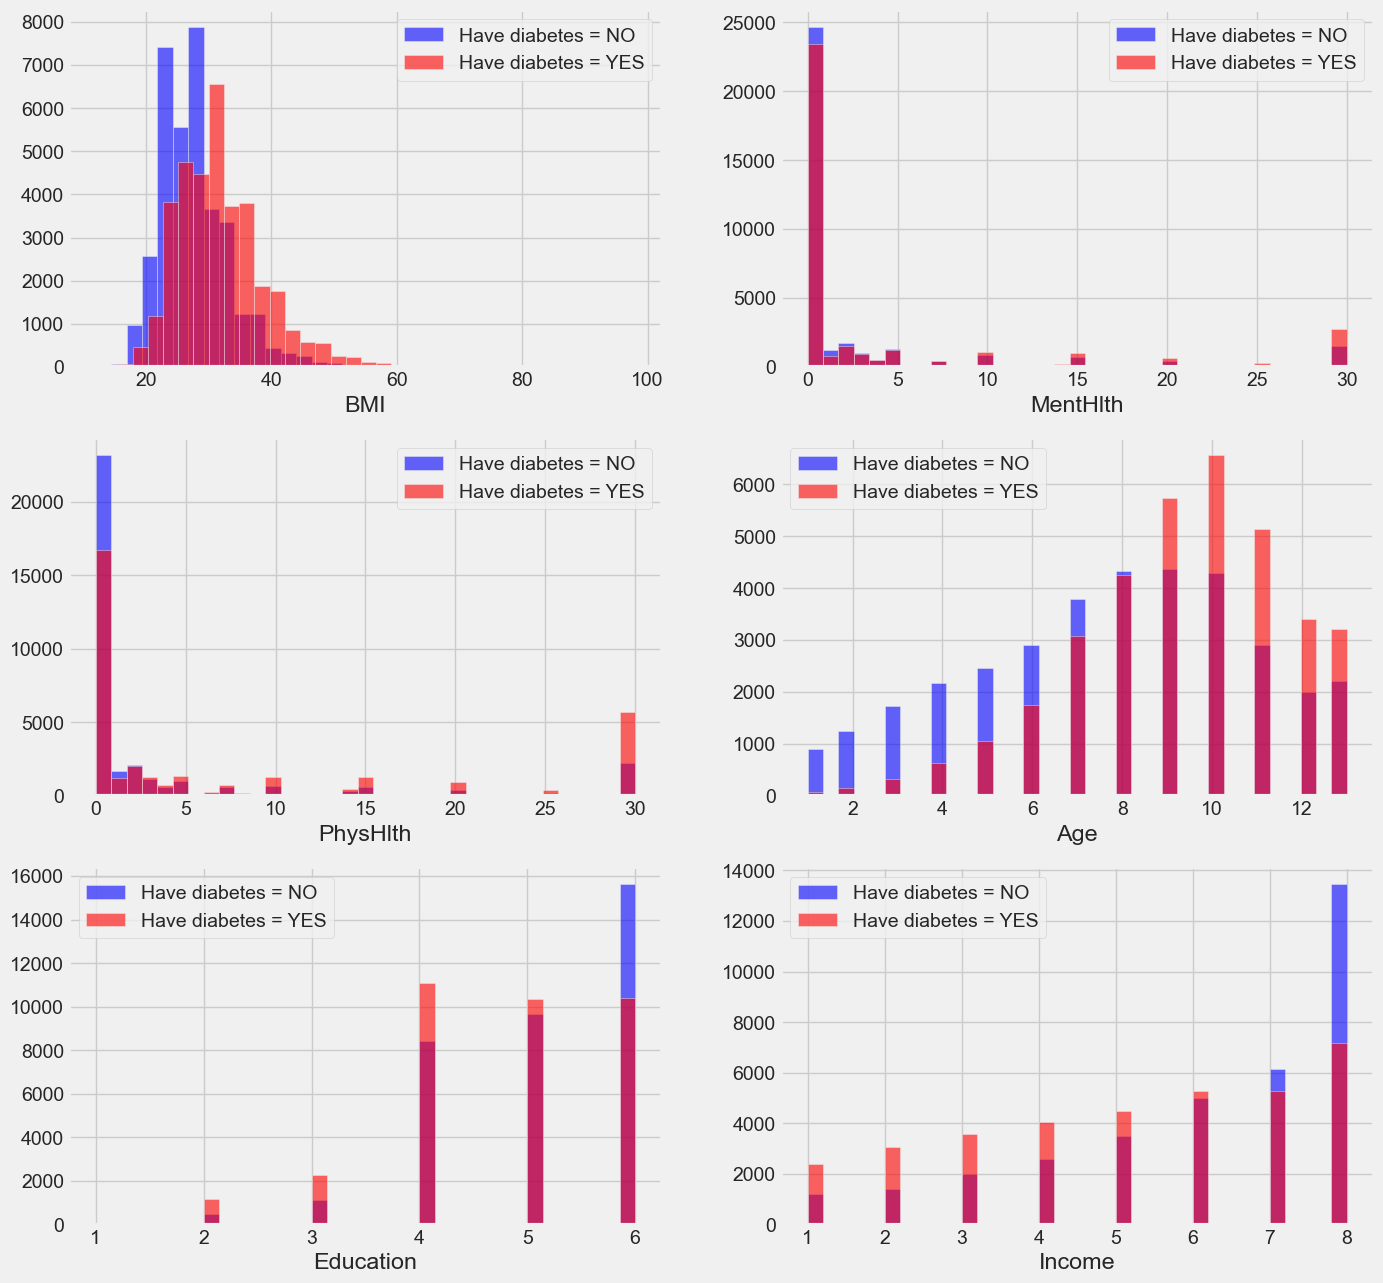

In [6]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["Diabetes_binary"] == 0][column].hist(bins=35, color='blue', label='Have diabetes = NO', alpha=0.6)
    data[data["Diabetes_binary"] == 1][column].hist(bins=35, color='red', label='Have diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
data.drop('Diabetes_binary', axis=1).corrwith(data['Diabetes_binary']).hvplot.barh(
    width=800, height=600, 
    title="Correlation between Diabetes and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',
)

In [ ]:
data.to_csv('C:\\Users\\drobn\\Desktop\\pmt\\api\\dataset.csv')

In [10]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(15)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0,0,1,40,1,0,0,0,1,...,1,0,5,0,30,1,0,9,5,8
1,0,0,0,1,28,0,0,0,1,1,...,1,1,2,0,0,0,0,1,5,3
2,1,1,1,1,38,0,0,0,0,0,...,1,0,3,0,0,0,1,10,6,8
3,1,1,1,1,35,1,0,0,0,0,...,1,0,5,20,30,1,1,10,5,6
4,0,1,1,1,47,0,0,0,1,0,...,1,0,4,0,0,0,0,11,4,6
5,1,0,1,1,25,1,0,0,1,0,...,1,1,2,0,0,1,1,8,4,6
6,0,0,0,1,27,0,0,0,1,0,...,1,0,1,0,0,0,0,7,5,8
7,1,1,1,1,37,0,0,0,1,1,...,1,0,4,0,0,0,1,7,4,8
8,0,0,0,1,23,0,0,0,1,0,...,1,0,1,2,1,0,1,2,6,8
9,1,1,0,1,32,1,0,0,1,1,...,1,0,3,14,0,1,1,4,4,7


In [11]:
#split 1
test = data[63000:]
test.shape

(7692, 22)

In [12]:
#split 2
data = data[:63000]
data.shape

(63000, 22)

In [13]:
data['fold'] = -1
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= 10)
for fold, (train_indicies, valid_indicies) in enumerate(skf.split(X=data,y=data['Diabetes_binary'])):
    data.loc[valid_indicies, "fold"] = fold

In [14]:
data0 = data[data.fold == 9]
data0['Diabetes_binary'].value_counts().hvplot.bar(
    title="Diabetes cases count", xlabel='Diabetes confirmed', ylabel='Count', 
    width=500, height=300
)

:Bars   [index]   (Diabetes_binary)

In [15]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import optuna

features = [c for c in data.columns if c not in ('Diabetes_binary','fold')]
def objective(trial):
    params = {
        'n_estimators':2500,
        'eval_metric': 'logloss',
        'learning_rate': trial.suggest_loguniform('learning_rate',1e-3,0.5),
        'booster':'gbtree',
        'use_label_encoder': False,
        'lambda':trial.suggest_loguniform('lambda',1,100),
        'alpha':trial.suggest_loguniform('alpha',0.5,100),
        'subsample':trial.suggest_loguniform('subsample',0.2,1),
        'colsample_bytree':trial.suggest_loguniform('colsample_bytree',0.1,1),
        'max_depth':trial.suggest_int('max_depth',1,8),
        'random_state':42
    }

    accuracies = []

    for fold in range(10):
        xtrain = data[data.fold != fold].reset_index(drop=True)
        xvalid = data[data.fold == fold].reset_index(drop=True)
        
        ytrain = xtrain['Diabetes_binary']
        yvalid = xvalid['Diabetes_binary']
        
        xtrain = xtrain[features]
        xvalid = xvalid[features]
        
        pipe = Pipeline([('sc', StandardScaler()), ('model', XGBClassifier(**params))])
        pipe.fit(X=xtrain, y=ytrain)
        
        accuracies.append(pipe.score(xvalid, yvalid))

    preds = np.mean(accuracies)
    return preds

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

c:\Users\drobn\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2022-09-05 13:51:29,212] A new study created in memory with name: no-name-a52db089-4495-4a7f-96a7-504efef9ebb6
[I 2022-09-05 13:54:24,092] Trial 0 finished with value: 0.7542539682539682 and parameters: {'learning_rate': 0.005032467273837551, 'lambda': 63.40642415919053, 'alpha': 1.35002479985202, 'subsample': 0.3126458467642667, 'colsample_bytree': 0.5618842678245505, 'max_depth': 6}. Best is trial 0 with value: 0.7542539682539682.
[I 2022-09-05 13:56:22,537] Trial 1 finished with value: 0.7444920634920635 and parameters: {'learning_rate': 0.24421727712218216, 'lambda': 1.1804462723194848, 'alpha': 1.5140715755054714, 'subsample': 0.3533536874465024, 'colsample_bytree': 0.5479854513407082, 'max_depth': 3}. Be

In [16]:
pipe = Pipeline([('sc', StandardScaler()), ('model', XGBClassifier(**study.best_params))])
X = data.drop(['Diabetes_binary', 'fold'], axis = 1)
y = data['Diabetes_binary']
pipe.fit(X, y)

import pickle

pickle.dump(pipe, open('C:\\Users\\drobn\\Desktop\\pmt\\api\\pipe.pkl', 'wb'))
X_test = test.drop(['Diabetes_binary'], axis = 1)
y_test = test['Diabetes_binary']
pipe.score(X_test, y_test)


0.7460998439937597